# Training the sine wave model

Based on the **hello_world** example from [TensorFlow Lite for MicroControllers](https://www.tensorflow.org/lite/microcontrollers/overview).

I removed a lot of the explanations, so if any of this doesn't make sense to you, [refer to the original notebook](https://github.com/tensorflow/tensorflow/blob/e0b19f6ef223af40e2e6d1d21b8464c1b2ebee8f/tensorflow/lite/micro/examples/hello_world/train/train_hello_world_model.ipynb).

Tested with TensorFlow 2.2.0.

In [3]:
# Install TensorFlow if you don't have it yet.
!pip install -q tensorflow==2.2.0

In [4]:
# Set a "seed" value, so we get the same random numbers each time we run this
# notebook for reproducible results.
import numpy as np
np.random.seed(1)

import tensorflow as tf
tf.random.set_seed(1)

In [5]:
import os
from tensorflow import keras
import matplotlib.pyplot as plt
import math

## Dataset

### 1. Generate Data

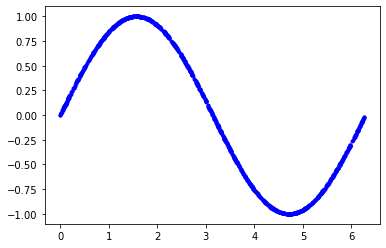

In [6]:
# Number of sample datapoints
SAMPLES = 1000

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(
    low=0, high=2*math.pi, size=SAMPLES).astype(np.float32)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values).astype(np.float32)

# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

### 2. Add Noise

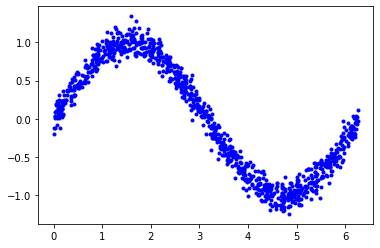

In [7]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

### 3. Split the Data

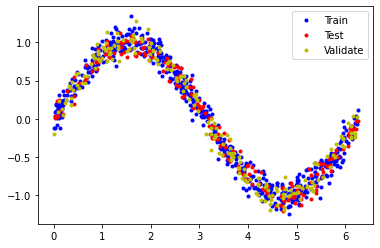

In [8]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()


## Training

In [190]:
# If you don't want to train again, load the trained model.
#model = keras.models.load_model("model.h5")

### 1. Design the Model

In [185]:
model = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model.add(keras.layers.Dense(16, activation='relu', input_shape=(1,)))

# The new second layer may help the network learn more complex representations
model.add(keras.layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model.add(keras.layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [186]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


### 2. Train the Model ###

In [187]:
history = model.fit(x_train, y_train, epochs=500, batch_size=64,
                    validation_data=(x_validate, y_validate))

Epoch 1/500
10/10 [==============================] - 0s 6ms/step - loss: 1.2013 - mae: 0.9294 - val_loss: 0.8761 - val_mae: 0.8433
Epoch 2/500
10/10 [==============================] - 0s 2ms/step - loss: 0.6677 - mae: 0.7329 - val_loss: 0.5611 - val_mae: 0.6737
Epoch 3/500
10/10 [==============================] - 0s 2ms/step - loss: 0.4962 - mae: 0.6183 - val_loss: 0.4849 - val_mae: 0.5979
Epoch 4/500
10/10 [==============================] - 0s 2ms/step - loss: 0.4578 - mae: 0.5729 - val_loss: 0.4657 - val_mae: 0.5845
Epoch 5/500
10/10 [==============================] - 0s 2ms/step - loss: 0.4392 - mae: 0.5618 - val_loss: 0.4461 - val_mae: 0.5753
Epoch 6/500
10/10 [==============================] - 0s 2ms/step - loss: 0.4200 - mae: 0.5556 - val_loss: 0.4280 - val_mae: 0.5658
Epoch 7/500
10/10 [==============================] - 0s 2ms/step - loss: 0.4014 - mae: 0.5441 - val_loss: 0.4088 - val_mae: 0.5530
Epoch 8/500
10/10 [==============================] - 0s 2ms/step - loss: 0.3830 - m

10/10 [==============================] - 0s 3ms/step - loss: 0.1068 - mae: 0.2532 - val_loss: 0.1222 - val_mae: 0.2738
Epoch 64/500
10/10 [==============================] - 0s 2ms/step - loss: 0.1065 - mae: 0.2515 - val_loss: 0.1218 - val_mae: 0.2710
Epoch 65/500
10/10 [==============================] - 0s 2ms/step - loss: 0.1055 - mae: 0.2508 - val_loss: 0.1221 - val_mae: 0.2753
Epoch 66/500
10/10 [==============================] - 0s 2ms/step - loss: 0.1047 - mae: 0.2496 - val_loss: 0.1203 - val_mae: 0.2684
Epoch 67/500
10/10 [==============================] - 0s 2ms/step - loss: 0.1041 - mae: 0.2470 - val_loss: 0.1199 - val_mae: 0.2677
Epoch 68/500
10/10 [==============================] - 0s 2ms/step - loss: 0.1036 - mae: 0.2468 - val_loss: 0.1193 - val_mae: 0.2685
Epoch 69/500
10/10 [==============================] - 0s 2ms/step - loss: 0.1027 - mae: 0.2452 - val_loss: 0.1185 - val_mae: 0.2657
Epoch 70/500
10/10 [==============================] - 0s 2ms/step - loss: 0.1024 - mae: 0

Epoch 125/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0720 - mae: 0.1979 - val_loss: 0.0847 - val_mae: 0.2178
Epoch 126/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0716 - mae: 0.1968 - val_loss: 0.0834 - val_mae: 0.2132
Epoch 127/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0706 - mae: 0.1942 - val_loss: 0.0829 - val_mae: 0.2124
Epoch 128/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0704 - mae: 0.1925 - val_loss: 0.0824 - val_mae: 0.2103
Epoch 129/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0698 - mae: 0.1922 - val_loss: 0.0816 - val_mae: 0.2100
Epoch 130/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0692 - mae: 0.1906 - val_loss: 0.0811 - val_mae: 0.2101
Epoch 131/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0689 - mae: 0.1923 - val_loss: 0.0804 - val_mae: 0.2090
Epoch 132/500
10/10 [==============================] - 0s 2ms/step - 

10/10 [==============================] - 0s 3ms/step - loss: 0.0428 - mae: 0.1490 - val_loss: 0.0503 - val_mae: 0.1663
Epoch 187/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0426 - mae: 0.1482 - val_loss: 0.0499 - val_mae: 0.1646
Epoch 188/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0422 - mae: 0.1480 - val_loss: 0.0494 - val_mae: 0.1633
Epoch 189/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0417 - mae: 0.1467 - val_loss: 0.0489 - val_mae: 0.1629
Epoch 190/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0416 - mae: 0.1456 - val_loss: 0.0488 - val_mae: 0.1634
Epoch 191/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0415 - mae: 0.1476 - val_loss: 0.0480 - val_mae: 0.1622
Epoch 192/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0406 - mae: 0.1452 - val_loss: 0.0477 - val_mae: 0.1627
Epoch 193/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0405 -

Epoch 248/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0254 - mae: 0.1168 - val_loss: 0.0281 - val_mae: 0.1288
Epoch 249/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0254 - mae: 0.1175 - val_loss: 0.0278 - val_mae: 0.1281
Epoch 250/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0250 - mae: 0.1162 - val_loss: 0.0281 - val_mae: 0.1269
Epoch 251/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0250 - mae: 0.1154 - val_loss: 0.0275 - val_mae: 0.1278
Epoch 252/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0250 - mae: 0.1168 - val_loss: 0.0274 - val_mae: 0.1269
Epoch 253/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0248 - mae: 0.1156 - val_loss: 0.0280 - val_mae: 0.1293
Epoch 254/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0247 - mae: 0.1163 - val_loss: 0.0269 - val_mae: 0.1260
Epoch 255/500
10/10 [==============================] - 0s 2ms/step - 

10/10 [==============================] - 0s 2ms/step - loss: 0.0183 - mae: 0.1045 - val_loss: 0.0189 - val_mae: 0.1082
Epoch 310/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0189 - mae: 0.1049 - val_loss: 0.0197 - val_mae: 0.1137
Epoch 311/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0194 - mae: 0.1091 - val_loss: 0.0180 - val_mae: 0.1091
Epoch 312/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0185 - mae: 0.1059 - val_loss: 0.0191 - val_mae: 0.1082
Epoch 313/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0187 - mae: 0.1052 - val_loss: 0.0179 - val_mae: 0.1081
Epoch 314/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0181 - mae: 0.1033 - val_loss: 0.0187 - val_mae: 0.1109
Epoch 315/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0188 - mae: 0.1056 - val_loss: 0.0181 - val_mae: 0.1071
Epoch 316/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0182 -

Epoch 371/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0156 - mae: 0.0990 - val_loss: 0.0150 - val_mae: 0.0999
Epoch 372/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0157 - mae: 0.0994 - val_loss: 0.0144 - val_mae: 0.0984
Epoch 373/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0154 - mae: 0.0983 - val_loss: 0.0145 - val_mae: 0.0990
Epoch 374/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0153 - mae: 0.0983 - val_loss: 0.0147 - val_mae: 0.0984
Epoch 375/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0151 - mae: 0.0975 - val_loss: 0.0146 - val_mae: 0.0990
Epoch 376/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0153 - mae: 0.0980 - val_loss: 0.0142 - val_mae: 0.0982
Epoch 377/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0151 - mae: 0.0978 - val_loss: 0.0144 - val_mae: 0.0979
Epoch 378/500
10/10 [==============================] - 0s 2ms/step - 

10/10 [==============================] - 0s 2ms/step - loss: 0.0148 - mae: 0.0963 - val_loss: 0.0133 - val_mae: 0.0937
Epoch 433/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0142 - mae: 0.0949 - val_loss: 0.0134 - val_mae: 0.0940
Epoch 434/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0140 - mae: 0.0942 - val_loss: 0.0131 - val_mae: 0.0935
Epoch 435/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0143 - mae: 0.0956 - val_loss: 0.0133 - val_mae: 0.0941
Epoch 436/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0148 - mae: 0.0960 - val_loss: 0.0133 - val_mae: 0.0938
Epoch 437/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0144 - mae: 0.0955 - val_loss: 0.0132 - val_mae: 0.0935
Epoch 438/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0142 - mae: 0.0944 - val_loss: 0.0136 - val_mae: 0.0943
Epoch 439/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0147 -

Epoch 494/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0143 - mae: 0.0951 - val_loss: 0.0131 - val_mae: 0.0925
Epoch 495/500
10/10 [==============================] - ETA: 0s - loss: 0.0145 - mae: 0.094 - 0s 2ms/step - loss: 0.0147 - mae: 0.0956 - val_loss: 0.0135 - val_mae: 0.0937
Epoch 496/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0143 - mae: 0.0946 - val_loss: 0.0128 - val_mae: 0.0919
Epoch 497/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0143 - mae: 0.0950 - val_loss: 0.0132 - val_mae: 0.0935
Epoch 498/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0146 - mae: 0.0970 - val_loss: 0.0129 - val_mae: 0.0919
Epoch 499/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0140 - mae: 0.0938 - val_loss: 0.0128 - val_mae: 0.0921
Epoch 500/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0140 - mae: 0.0940 - val_loss: 0.0132 - val_mae: 0.0925


### 3. Plot Metrics

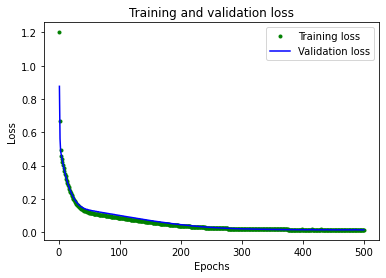

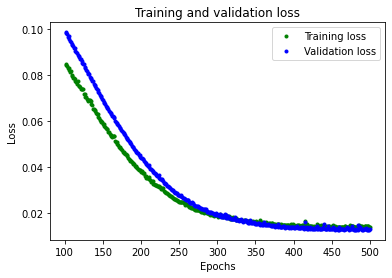

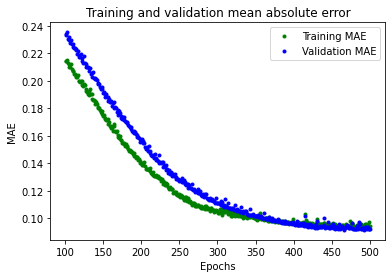

In [191]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

### 4. Check against test set

7/7 [==============================] - 0s 569us/step - loss: 0.0107 - mean_absolute_error: 0.0832


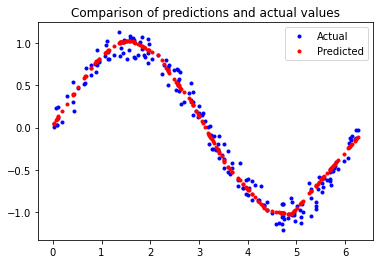

In [192]:
# Calculate and print the loss on our test dataset
loss = model.evaluate(x_test, y_test)

# Make predictions based on our test dataset
predictions = model.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [95]:
# Save the trained model just in case we need it again later.
model.save("model.h5")

## NumPy version

Let's see how we can make predictions by hand. If we grab the weights from the layers, we can do the math ourselves.

In [209]:
W1, b1 = model.layers[0].get_weights()
W2, b2 = model.layers[1].get_weights()
W3, b3 = model.layers[2].get_weights()

In [210]:
print(W1.shape, b1.shape)
print(W2.shape, b2.shape)
print(W3.shape, b3.shape)

(1, 16) (16,)
(16, 16) (16,)
(16, 1) (1,)


In [211]:
xs = x_test

In [212]:
# This is what the TF model does internally:
ys = []
for x in xs:
    x = np.array([x])       # x should be array
    h1 = x @ W1 + b1        # dense layer
    h1 = np.maximum(0, h1)  # ReLU
    h2 = h1 @ W2 + b2       # dense layer
    h2 = np.maximum(0, h2)  # ReLU
    h3 = h2 @ W3 + b3       # dense layer
    ys.append(h3)

ys = np.stack(ys)

In [213]:
# Are our predictions the same as TF's predictions?
# This should print 0 if the results are close enough.
np.sum(np.abs(ys - predictions) > 1e-6)

0

## Export the weights

In [214]:
# Note that we transpose W2. This makes the inner loop for the
# matrix multiplication a little simpler.

names = ["W1_data", "b1_data", "W2_data", "b2_data", "W3_data", "b3_data"]
arrays = [W1, b1, W2.T, b2, W3, b3]

In [217]:
# Copy this into model_data.cpp:

for name, array in zip(names, arrays):
    print("const float %s[] PROGMEM = {" % name)
    print("   ", ", ".join([str(x) + "f" for x in array.flatten()]))
    print("};\n")

const float W1_data[] PROGMEM = {
    -0.39788383f, 0.46116278f, 0.3715687f, -0.07777083f, -0.2472133f, 0.13155949f, 0.6120839f, -0.07711333f, 0.30813938f, 0.0954016f, 0.069017954f, 0.14382412f, 0.50789833f, 0.18803687f, -0.0057444884f, -0.5632218f
};

const float b1_data[] PROGMEM = {
    0.0f, 0.47112474f, -1.0349379f, 0.0f, 0.0f, 0.018007103f, -0.6069822f, 0.0f, -0.4051202f, 0.33553293f, 0.78297186f, 0.13247779f, 0.08387113f, -0.1520639f, 0.3705848f, 0.0f
};

const float W2_data[] PROGMEM = {
    0.008752942f, 0.10046681f, -0.5594067f, -0.38656723f, 0.026203513f, 0.3809035f, -0.27524522f, 0.22883019f, -0.54360247f, 0.30872577f, 0.2096457f, -0.2986594f, 0.16710472f, 0.08122665f, 0.49408376f, 0.26714543f, -0.04890293f, 0.23022875f, 1.0559002f, -0.13226247f, 0.36876526f, -0.4758394f, 0.014797875f, 0.19773671f, 0.14072222f, 0.09920495f, -0.28671607f, -0.2952227f, 0.22445521f, -0.1557873f, -0.44671398f, -0.26854938f, -0.079212666f, -0.061804853f, 0.20164743f, 0.033375174f, 0.41258594f, 0